In [82]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import scipy
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
train_df = pd.read_csv('https://raw.githubusercontent.com/Discipe/mlcourse_open/master/data/howpop_train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/rsouza/mlcourse_open/master/data/howpop_test.csv')

In [6]:
train_df.shape , test_df.shape

((134137, 17), (3990, 9))

In [7]:
train_df.head(5)

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,1.627469,1.300050,1.167375
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,1.362397,0.961094,2.020356


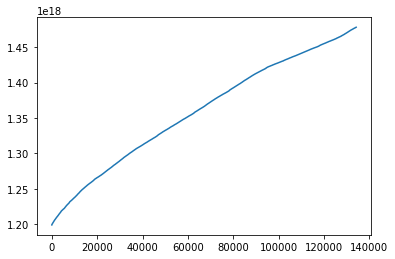

In [8]:
train_df['published'].apply(lambda ts: pd.to_datetime(ts).value).plot();

In [16]:
features = ['author','flow','domain','title']


In [17]:
len(train_df) , train_size

(134137, 93895)

In [18]:
X , y = train_df.loc[:,features] , train_df['favs_lognorm']

X_test = test_df.loc[:,features]

In [21]:
X_train , X_valid , y_train , y_valid = train_test_split(X,y,test_size=0.3,random_state=17)

In [22]:
X_train.shape , X_valid.shape , y_train.shape , y_valid.shape

((93895, 4), (40242, 4), (93895,), (40242,))

In [23]:
X_train.head()

,author,flow,domain,title
66936,@vadimus,develop,habrahabr.ru,Хабраинтервью с разработчиками «Космических ре...
72161,@dnovikoff,develop,habrahabr.ru,Пять подводных камней при использовании shared...
116320,@marks,NaN,geektimes.ru,Новый законопроект ограничивает общение россия...
40080,@strelok_aka_vc,develop,habrahabr.ru,Интеграция asterisk с Active Directory
65279,NaN,NaN,geektimes.ru,CeBIT 2013. День второй. Intel Extreme Masters...


In [84]:
td_idc = TfidfVectorizer(ngram_range=(1,2),max_features=50000,min_df=2)

logit = LogisticRegression(C=1,n_jobs=-1,random_state=17,solver='lbfgs',verbose=1)

tf_idc_logit_pipeline = Pipeline([('td_idc',td_idc),
                                  ('logit',logit)])